## Preprocessing

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load data
data = pd.read_csv('data_kalori.csv')
data.head()

,id,calories,proteins,fat,carbohydrate,name,kategori,image,kategori_kalori
0,1,280.0,9.2,28.4,0.0,Abon,Lemak,https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...,Sedang
1,2,0.0,0.0,0.2,0.0,Agar-agar,Lemak,https://res.cloudinary.com/dk0z4ums3/image/upl...,Rendah
2,3,45.0,1.1,0.4,10.8,Akar tonjong,Karbo,https://images.tokopedia.net/img/cache/200-squ...,Rendah
3,4,37.0,4.4,0.5,3.8,Aletoge,Protein,https://nilaigizi.com/assets/images/produk/pro...,Rendah
4,5,85.0,0.9,6.5,7.7,Alpukat,Karbo,https://katakabar.com/assets/images/upload/new...,Rendah


In [2]:
data.drop(columns=['image'], inplace=True)
data.head()

,id,calories,proteins,fat,carbohydrate,name,kategori,kategori_kalori
0,1,280.0,9.2,28.4,0.0,Abon,Lemak,Sedang
1,2,0.0,0.0,0.2,0.0,Agar-agar,Lemak,Rendah
2,3,45.0,1.1,0.4,10.8,Akar tonjong,Karbo,Rendah
3,4,37.0,4.4,0.5,3.8,Aletoge,Protein,Rendah
4,5,85.0,0.9,6.5,7.7,Alpukat,Karbo,Rendah


In [3]:
print("\nMissing values:")
data.isnull().sum()


Missing values:


id                 0
calories           0
proteins           0
fat                0
carbohydrate       0
name               0
kategori           0
kategori_kalori    0
dtype: int64

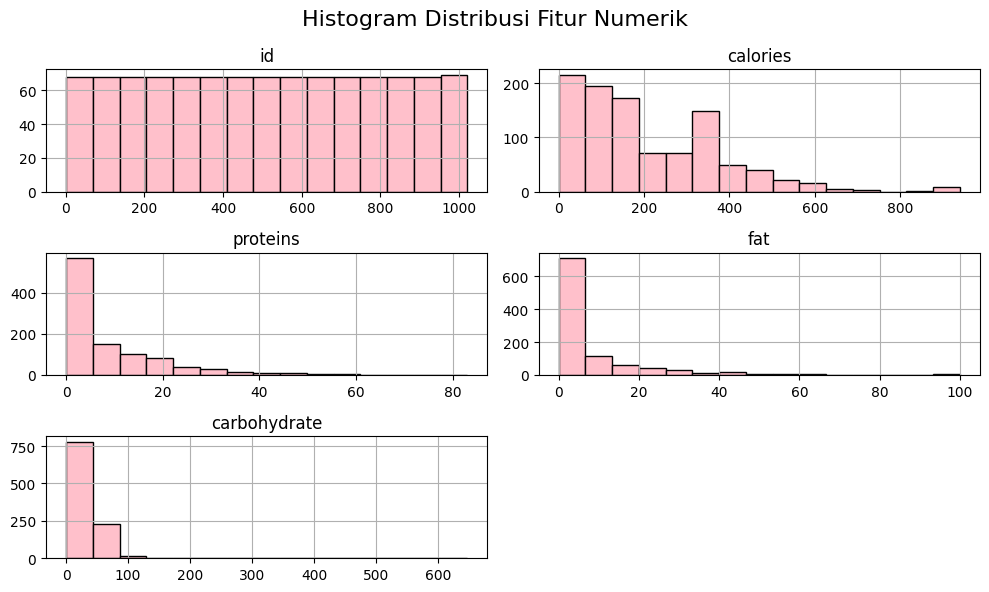

In [4]:
data.hist(bins=15, figsize=(10, 6), color='pink', edgecolor='black')
plt.suptitle("Histogram Distribusi Fitur Numerik", fontsize=16)
plt.tight_layout()
plt.grid(False) 
plt.show()

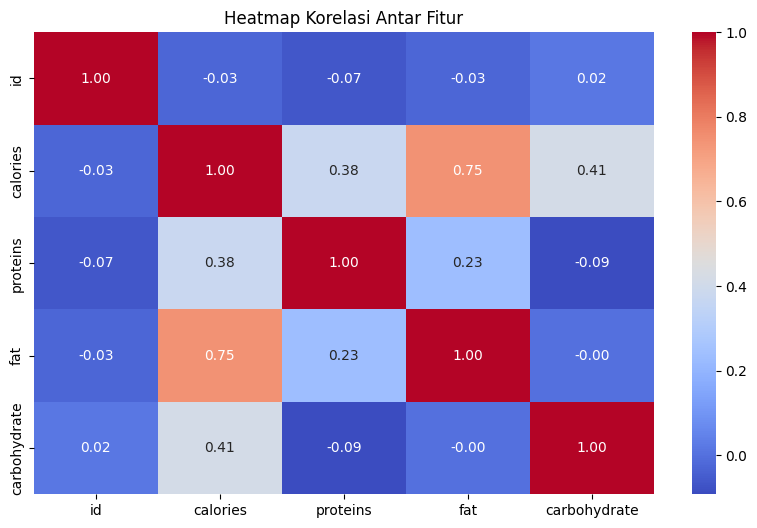

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [6]:
# Pilih fitur untuk clustering
X = data[['calories', 'proteins']]
X

,calories,proteins
0,280.0,9.2
1,0.0,0.0
2,45.0,1.1
3,37.0,4.4
4,85.0,0.9
...,...,...
1016,42.0,1.2
1017,37.0,1.0
1018,28.0,0.7
1019,254.0,3.0


In [7]:
# Normalisasi data 
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Baseline Model

## K-Means Clustering

### Cluster optimal 

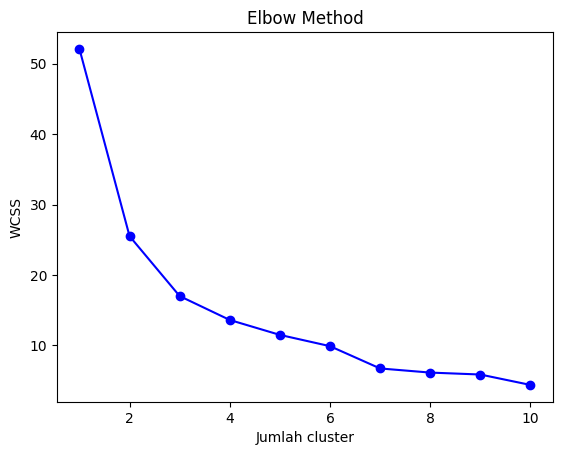

In [8]:
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method')
plt.xlabel('Jumlah cluster')
plt.ylabel('WCSS')
plt.show()

In [9]:
# Membuat model K-Means dengan 3 cluster
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Menambahkan cluster ke dataframe
data['cluster'] = clusters

In [10]:
data.to_csv('makanan_cluster_kmeans.csv', index=False)

In [11]:
print(data['cluster'].value_counts())

cluster
1    632
2    274
0    115
Name: count, dtype: int64


### Evaluasi Model

In [12]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluasi performa clustering
silhouette_avg = silhouette_score(X_scaled, clusters)
db_index = davies_bouldin_score(X_scaled, clusters)
ch_score = calinski_harabasz_score(X_scaled, clusters)

print("Evaluasi Model K-Means Clustering:")
print(f"Silhouette Score         : {silhouette_avg:.3f}")
print(f"Davies-Bouldin Index     : {db_index:.3f}")
print(f"Calinski-Harabasz Index  : {ch_score:.3f}")


Evaluasi Model K-Means Clustering:
Silhouette Score         : 0.543
Davies-Bouldin Index     : 0.840
Calinski-Harabasz Index  : 1049.527


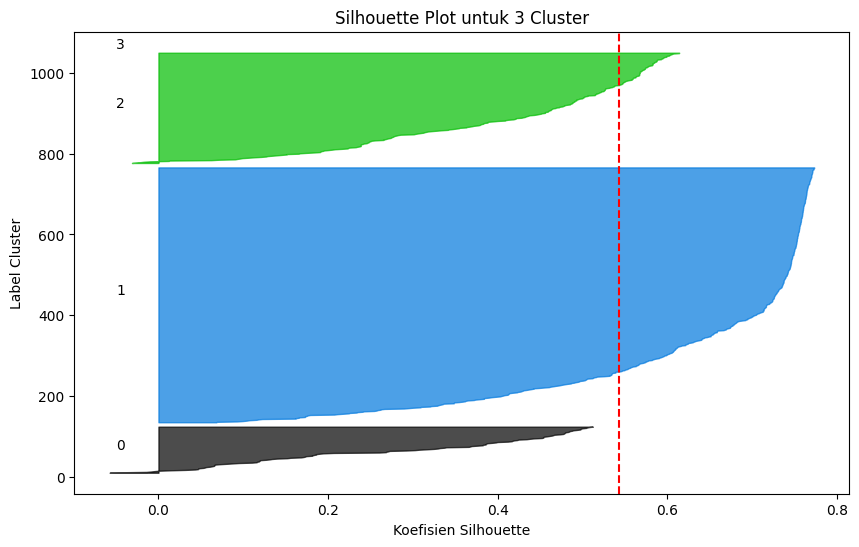

In [13]:
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.cm as cm

silhouette_values = silhouette_samples(X_scaled, clusters)

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(4):
    cluster_silhouette_values = silhouette_values[clusters == i]
    cluster_silhouette_values.sort()
    
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 4)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title("Silhouette Plot untuk 3 Cluster")
plt.xlabel("Koefisien Silhouette")
plt.ylabel("Label Cluster")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()

=== Cluster K-Means ===
Silhouette Score: 0.543
Davies-Bouldin: 0.840


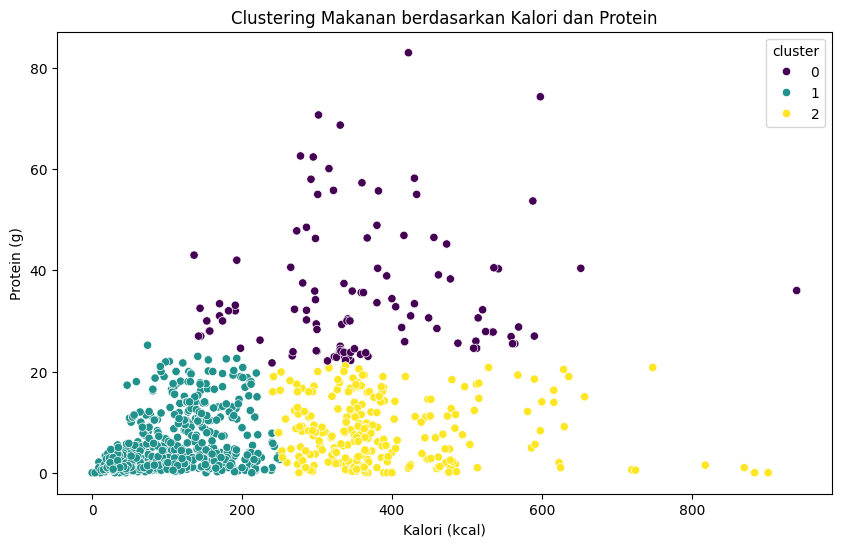

In [ ]:
print("=== Cluster K-Means ===")
print(f"Silhouette Score: {silhouette_score(X_scaled, clusters):.3f}")
print(f"Davies-Bouldin: {davies_bouldin_score(X_scaled, clusters):.3f}")
# Visualisasi cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data= data, x='calories', y='proteins', hue='cluster', palette='viridis')
plt.title('Clustering Makanan berdasarkan Kalori dan Protein')
plt.xlabel('Kalori (kcal)')
plt.ylabel('Protein (g)')
plt.show()

In [15]:
# Statistik deskriptif per cluster (K-Means)
cluster_stats = data.groupby('cluster')[['calories', 'proteins']].describe()
print(cluster_stats)

        calories                                                             \
           count        mean         std    min    25%    50%    75%    max   
cluster                                                                       
0          115.0  363.356522  131.924366  136.0  289.0  341.0  431.5  940.0   
1          632.0  100.872468   59.596304    0.0   48.0   96.0  145.0  250.0   
2          274.0  396.355839  128.436240  241.0  328.0  356.5  429.5  902.0   

        proteins                                                         
           count       mean        std   min    25%   50%     75%   max  
cluster                                                                  
0          115.0  35.082609  12.807072  21.7  25.55  30.6  40.350  83.0  
1          632.0   5.165348   5.552186   0.0   1.20   2.9   7.300  25.2  
2          274.0   8.078832   6.340340   0.0   2.20   7.4  12.675  21.1  


Cluster 0: makanan sedang kalori tinggi protein
Cluster 1: makanan rendah kalori rendah protein
Cluster 2: makanan tinggi kalori sedang protein

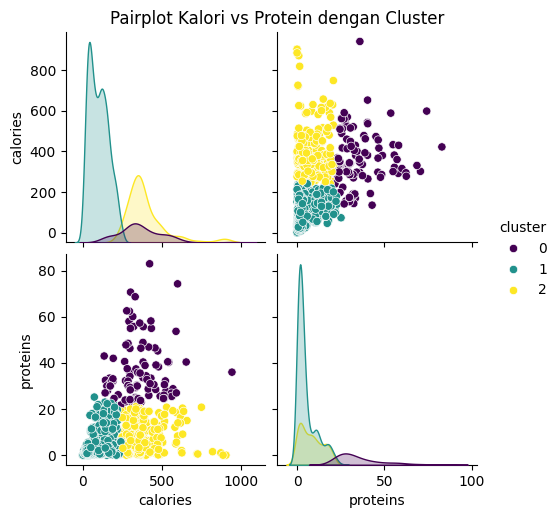

In [16]:
sns.pairplot(data, vars=['calories', 'proteins'], hue='cluster', palette='viridis')
plt.suptitle("Pairplot Kalori vs Protein dengan Cluster", y=1.02)
plt.show()

## Hierarchical Clustering

### Cluster optimal

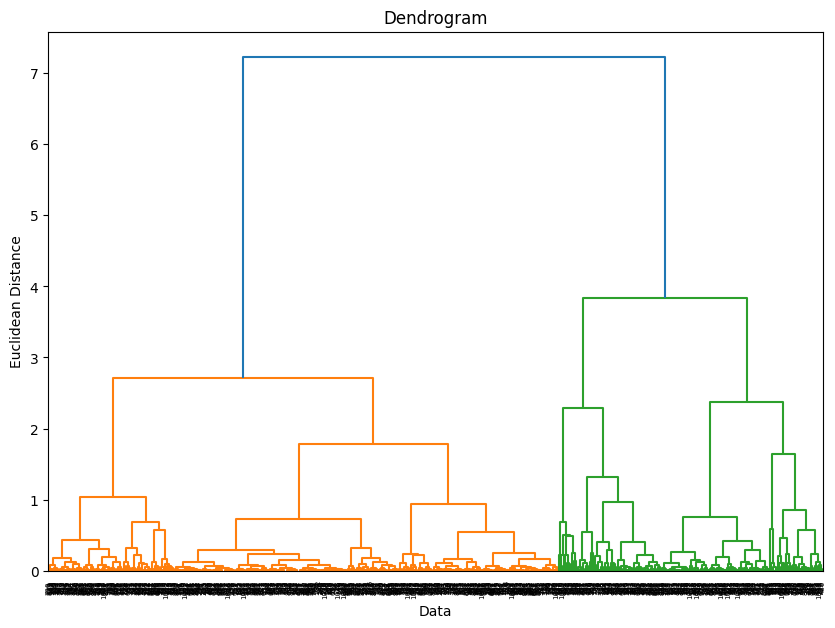

In [17]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Dendrogram untuk menentukan jumlah cluster
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data')
plt.ylabel('Euclidean Distance')
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering

# Membuat model Hierarchical Clustering dengan 3 cluster
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = hc.fit_predict(X_scaled)

# Menambahkan hasil cluster ke dataframe
data['cluster'] = clusters


In [19]:
print(data['cluster'].value_counts())

cluster
0    673
1    214
2    134
Name: count, dtype: int64


### Evaluasi Model

In [20]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluasi performa clustering
silhouette_avg = silhouette_score(X_scaled, clusters)
db_index = davies_bouldin_score(X_scaled, clusters)
ch_score = calinski_harabasz_score(X_scaled, clusters)

print("Evaluasi Model Hierarchical Clustering:")
print(f"Silhouette Score         : {silhouette_avg:.3f}")
print(f"Davies-Bouldin Index     : {db_index:.3f}")
print(f"Calinski-Harabasz Index  : {ch_score:.3f}")


Evaluasi Model Hierarchical Clustering:
Silhouette Score         : 0.520
Davies-Bouldin Index     : 0.879
Calinski-Harabasz Index  : 914.135


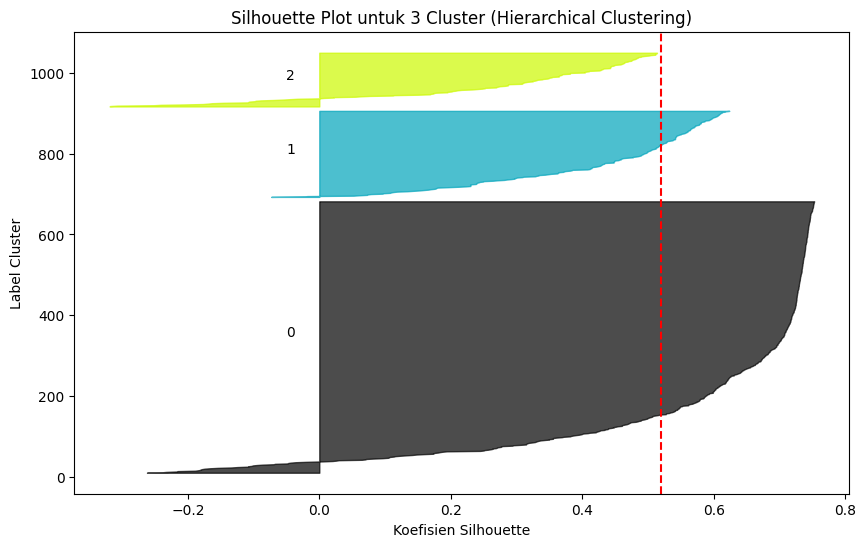

In [21]:
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Menghitung nilai silhouette untuk tiap data
silhouette_values = silhouette_samples(X_scaled, clusters)

plt.figure(figsize=(10, 6))
y_lower = 10
n_clusters = 3  # karena kita menggunakan 3 cluster

for i in range(n_clusters):
    cluster_silhouette_values = silhouette_values[clusters == i]
    cluster_silhouette_values.sort()
    
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title("Silhouette Plot untuk 3 Cluster (Hierarchical Clustering)")
plt.xlabel("Koefisien Silhouette")
plt.ylabel("Label Cluster")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()


In [22]:
# Statistik deskriptif per cluster (Hierarchical)
cluster_stats = data.groupby('cluster')[['calories', 'proteins']].describe()
print(cluster_stats)

        calories                                                               \
           count        mean         std    min     25%    50%     75%    max   
cluster                                                                         
0          673.0  108.946508   67.087619    0.0   50.00  102.0  154.00  296.0   
1          214.0  419.857944  140.410639  258.0  344.25  364.0  463.50  940.0   
2          134.0  380.360448   89.488626  136.0  328.50  356.5  417.75  652.0   

        proteins                                                           
           count       mean        std   min     25%    50%     75%   max  
cluster                                                                    
0          673.0   5.884250   6.707575   0.0   1.300   3.00   8.300  33.4  
1          214.0   6.487850   5.500076   0.0   1.625   5.55   9.625  36.0  
2          134.0  31.075373  14.253972  14.0  20.700  26.45  38.100  83.0  


=== Cluster Hierarchical Sebelum Tuning ===
Silhouette Score: 0.520
Davies-Bouldin: 0.879


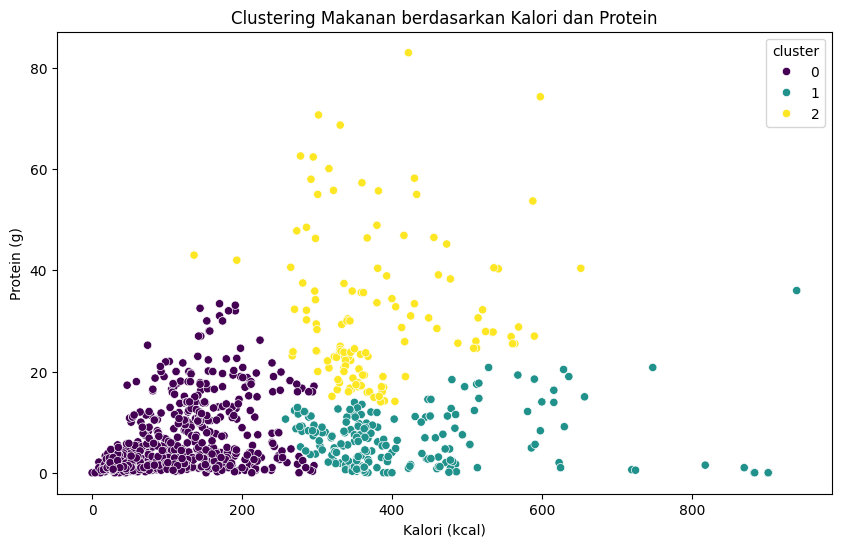

In [23]:
print("=== Cluster Hierarchical Sebelum Tuning ===")
print(f"Silhouette Score: {silhouette_score(X_scaled, clusters):.3f}")
print(f"Davies-Bouldin: {davies_bouldin_score(X_scaled, clusters):.3f}")
# Visualisasi cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data= data, x='calories', y='proteins', hue='cluster', palette='viridis')
plt.title('Clustering Makanan berdasarkan Kalori dan Protein')
plt.xlabel('Kalori (kcal)')
plt.ylabel('Protein (g)')
plt.show()

In [24]:
# Statistik deskriptif per cluster
cluster_stats = data.groupby('cluster')[['calories', 'proteins']].describe()
print(cluster_stats)

        calories                                                               \
           count        mean         std    min     25%    50%     75%    max   
cluster                                                                         
0          673.0  108.946508   67.087619    0.0   50.00  102.0  154.00  296.0   
1          214.0  419.857944  140.410639  258.0  344.25  364.0  463.50  940.0   
2          134.0  380.360448   89.488626  136.0  328.50  356.5  417.75  652.0   

        proteins                                                           
           count       mean        std   min     25%    50%     75%   max  
cluster                                                                    
0          673.0   5.884250   6.707575   0.0   1.300   3.00   8.300  33.4  
1          214.0   6.487850   5.500076   0.0   1.625   5.55   9.625  36.0  
2          134.0  31.075373  14.253972  14.0  20.700  26.45  38.100  83.0  


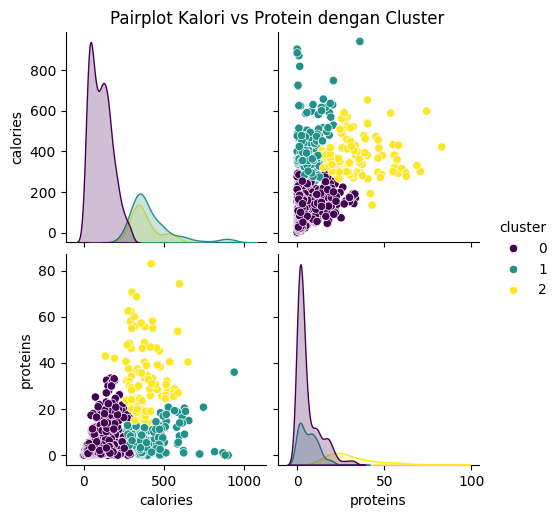

In [25]:
sns.pairplot(data, vars=['calories', 'proteins'], hue='cluster', palette='viridis')
plt.suptitle("Pairplot Kalori vs Protein dengan Cluster", y=1.02)
plt.show()

# Tuning Model

## Grid Search K-Means Clustering

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_clusters': range(2, 8),
    'init': ['k-means++', 'random'],
    'algorithm': ['lloyd', 'elkan']
}

kmeans_tuning = KMeans(random_state=42)
grid_search = GridSearchCV(kmeans_tuning, param_grid, cv=5, 
                         scoring=lambda estimator, X: silhouette_score(X, estimator.predict(X)))
grid_search.fit(X_scaled)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 3}


In [27]:
final_kmeans = KMeans(
    n_clusters=grid_search.best_params_['n_clusters'],
    init=grid_search.best_params_['init'],
    algorithm=grid_search.best_params_['algorithm'],
    random_state=42
)

final_clusters = final_kmeans.fit_predict(X_scaled)
data['optimized_cluster'] = final_clusters

In [28]:
best_kmeans = grid_search.best_estimator_
labels = best_kmeans.predict(X_scaled)

print(f"Best silhouette score: {grid_search.best_score_:.3f}")
# Davies-Bouldin Index
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin Index: {db_score:.3f}")

# Calinski-Harabasz Index
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(X_scaled, labels)
print(f"Calinski-Harabasz Index: {ch_score:.3f}")

Best silhouette score: 0.535
Davies-Bouldin Index: 0.840
Calinski-Harabasz Index: 1049.527


In [29]:
# Statistik deskriptif per cluster
cluster_stats = data.groupby('optimized_cluster')[['calories', 'proteins']].describe()
print(cluster_stats)

                  calories                                               \
                     count        mean         std    min    25%    50%   
optimized_cluster                                                         
0                    115.0  363.356522  131.924366  136.0  289.0  341.0   
1                    632.0  100.872468   59.596304    0.0   48.0   96.0   
2                    274.0  396.355839  128.436240  241.0  328.0  356.5   

                                proteins                                     \
                     75%    max    count       mean        std   min    25%   
optimized_cluster                                                             
0                  431.5  940.0    115.0  35.082609  12.807072  21.7  25.55   
1                  145.0  250.0    632.0   5.165348   5.552186   0.0   1.20   
2                  429.5  902.0    274.0   8.078832   6.340340   0.0   2.20   

                                       
                    50%     75%   

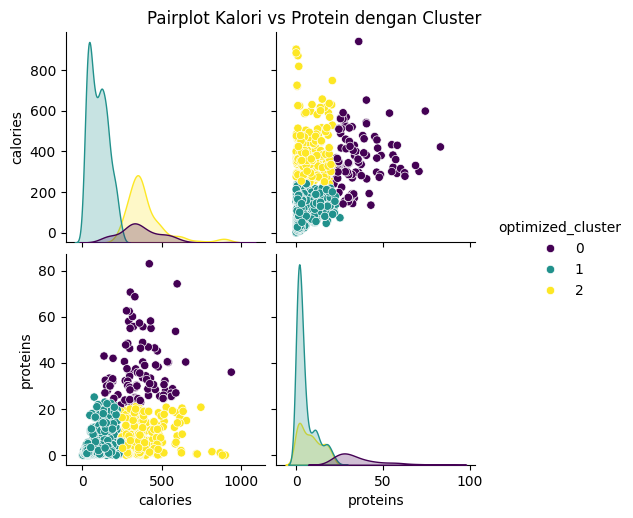

In [30]:
sns.pairplot(data, vars=['calories', 'proteins'], hue='optimized_cluster', palette='viridis')
plt.suptitle("Pairplot Kalori vs Protein dengan Cluster", y=1.02)
plt.show()


=== Cluster K-Means Setelah Tuning ===
Silhouette Score: 0.543
Davies-Bouldin: 0.840


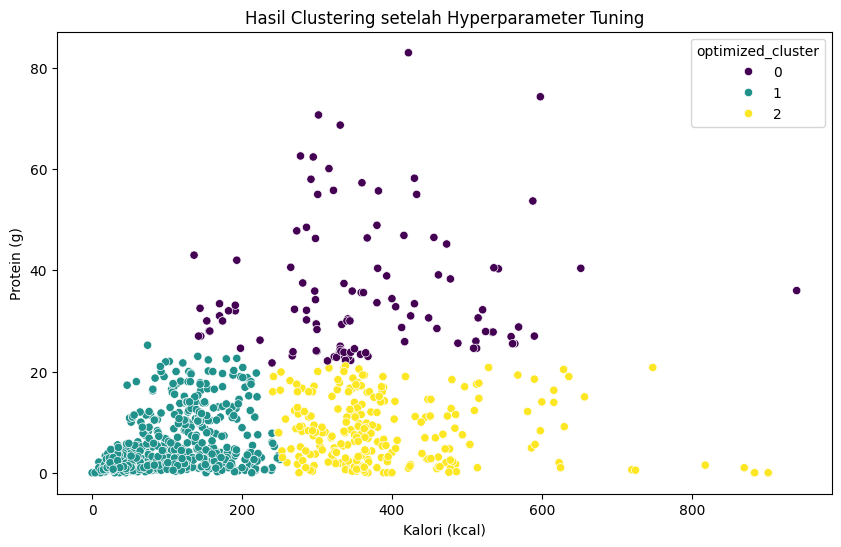

In [31]:
print("\n=== Cluster K-Means Setelah Tuning ===")
print(f"Silhouette Score: {silhouette_score(X_scaled, final_clusters):.3f}")
print(f"Davies-Bouldin: {davies_bouldin_score(X_scaled, final_clusters):.3f}")
# Visualisasi cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='calories', y='proteins', hue='optimized_cluster', palette='viridis')
plt.title('Hasil Clustering setelah Hyperparameter Tuning')
plt.xlabel('Kalori (kcal)')
plt.ylabel('Protein (g)')
plt.show()

In [32]:
joblib.dump(kmeans, 'model_cluster_1.pkl')
joblib.dump(scaler, 'scaler_makanan.pkl')

['scaler_makanan.pkl']

# Percobaan

In [33]:
import joblib

# Load model clustering
model = joblib.load("model_cluster_1.pkl")
scaler = joblib.load('scaler_makanan.pkl')

In [34]:
# Load data makanan
df = pd.read_csv("data_kalori.csv")

# Normalisasi nama makanan
df['name'] = df['name'].str.strip()
df['name_lower'] = df['name'].str.lower()

# Prediksi cluster langsung
fitur = df[['calories', 'proteins']]  # Sesuaikan dengan model
fitur_scaled = scaler.transform(fitur)
df['cluster'] = model.predict(fitur)


c:\Users\Aulia anantiyo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [35]:
# Fungsi menentukan klaster rekomendasi berdasarkan kalori tersisa
def klaster_sesuai(sisa_kalori):
    if sisa_kalori > 1000:
        return [2]  
    elif 300 <= sisa_kalori <= 1000:
        return [1]
    else:
        return [0]  


In [36]:
def filter_rekomendasi(df, sisa_kalori):
    klaster_target = klaster_sesuai(sisa_kalori)
    return df[df['cluster'].isin(klaster_target)]

In [37]:
kalori_tersisa = 1200 
rekomendasi = filter_rekomendasi(df, kalori_tersisa)
print(f"\n✅ Rekomendasi untuk Kalori Tersisa: {kalori_tersisa} kcal")
rekomendasi[['name', 'calories', 'proteins', 'cluster']] 



✅ Rekomendasi untuk Kalori Tersisa: 1200 kcal


,name,calories,proteins,cluster
0,Abon,280.0,9.2,2
2,Akar tonjong,45.0,1.1,2
4,Alpukat,85.0,0.9,2
5,Andaliman,99.0,4.6,2
6,Andewi,25.0,1.6,2
...,...,...,...,...
1016,Wortel Segar,42.0,1.2,2
1017,Wortel kukus,37.0,1.0,2
1018,Wortel rebus,28.0,0.7,2
1019,Yangko,254.0,3.0,2


# MLFlow K-Means V.1

In [ ]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.pyfunc
import joblib
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# ===== 1. Setup MLflow Tracking & Experiment =====
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("KMeans Clustering - Kalori")

# ===== 2. Load Data =====
data = pd.read_csv("data_kalori.csv")  # Pastikan file ini sesuai
X = data[['calories', 'proteins']]  # Contoh fitur yang digunakan

# ===== 3. Scaling Data =====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===== 4. Training + Logging Model =====
k = 3
with mlflow.start_run() as run:
    # Simpan parameter
    mlflow.log_param("n_clusters", k)

    # Training model
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Hitung evaluasi clustering
    silhouette_avg = silhouette_score(X_scaled, clusters)
    db_index = davies_bouldin_score(X_scaled, clusters)
    ch_score = calinski_harabasz_score(X_scaled, clusters)

    # Log metrics
    mlflow.log_metrics({
        "silhouette_score": silhouette_avg,
        "davies_bouldin_index": db_index,
        "calinski_harabasz_index": ch_score
    })

    # Simpan model dan scaler sebagai file .pkl
    kmeans_path = "kmeans_model.pkl"
    scaler_path = "scaler.pkl"
    joblib.dump(kmeans, kmeans_path)
    joblib.dump(scaler, scaler_path)

    # ===== 5. Log Model ke MLflow Registry =====
    class KMeansWrapper(mlflow.pyfunc.PythonModel):
        def load_context(self, context):
            import joblib
            self.kmeans = joblib.load(context.artifacts["kmeans_model"])
            self.scaler = joblib.load(context.artifacts["scaler_model"])

        def predict(self, context, model_input):
            X_input = self.scaler.transform(model_input)
            return self.kmeans.predict(X_input)

    mlflow.pyfunc.log_model(
        artifact_path="model",
        python_model=KMeansWrapper(),
        artifacts={
            "kmeans_model": kmeans_path,
            "scaler_model": scaler_path
        }
    )

    # Register Model
    model_uri = f"runs:/{run.info.run_id}/model"
    model_name = "KMeans"
    result = mlflow.register_model(model_uri=model_uri, name=model_name)

    print(f"✅ Model berhasil diregistrasi: {model_name}, versi {result.version}")
    print(f"Silhouette Score: {silhouette_avg:.3f}")
    print(f"Davies-Bouldin Index: {db_index:.3f}")
    print(f"Calinski-Harabasz Index: {ch_score:.3f}")


# MLFlow HC

In [ ]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.pyfunc
import joblib
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# ===== 1. Setup MLflow Tracking & Experiment =====
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("Hierarchical Clustering - Kalori")

# ===== 2. Load Data =====
data = pd.read_csv("data_kalori.csv")  # Pastikan file ini sesuai
X = data[['calories', 'proteins']]  # Contoh fitur yang digunakan

# ===== 3. Scaling Data =====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===== 4. Training + Logging Model =====
n_clusters = 3
linkage_method = 'ward'

with mlflow.start_run() as run:
    # Simpan parameter
    mlflow.log_param("n_clusters", n_clusters)
    mlflow.log_param("linkage", linkage_method)

    # Training model
    hc = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
    clusters = hc.fit_predict(X_scaled)

    # Hitung evaluasi clustering
    silhouette_avg = silhouette_score(X_scaled, clusters)
    db_index = davies_bouldin_score(X_scaled, clusters)
    ch_score = calinski_harabasz_score(X_scaled, clusters)

    # Log metrics
    mlflow.log_metrics({
        "silhouette_score": silhouette_avg,
        "davies_bouldin_index": db_index,
        "calinski_harabasz_index": ch_score
    })

    # Simpan model dan scaler sebagai file .pkl
    hc_path = "hc_model.pkl"
    scaler_path = "scaler.pkl"
    joblib.dump(hc, hc_path)
    joblib.dump(scaler, scaler_path)

    # ===== 5. Log Model ke MLflow Registry =====
    class HCWrapper(mlflow.pyfunc.PythonModel):
        def load_context(self, context):
            import joblib
            self.hc = joblib.load(context.artifacts["hc_model"])
            self.scaler = joblib.load(context.artifacts["scaler_model"])

        def predict(self, context, model_input):
            X_input = self.scaler.transform(model_input)
            # Perlu fit_predict baru karena AgglomerativeClustering tidak memiliki metode `predict`
            return self.hc.fit_predict(X_input)

    mlflow.pyfunc.log_model(
        artifact_path="model",
        python_model=HCWrapper(),
        artifacts={
            "hc_model": hc_path,
            "scaler_model": scaler_path
        }
    )

    # Register Model
    model_uri = f"runs:/{run.info.run_id}/model"
    model_name = "Hierarchical"
    result = mlflow.register_model(model_uri=model_uri, name=model_name)

    print(f"✅ Model berhasil diregistrasi: {model_name}, versi {result.version}")
    print(f"Silhouette Score: {silhouette_avg:.3f}")
    print(f"Davies-Bouldin Index: {db_index:.3f}")
    print(f"Calinski-Harabasz Index: {ch_score:.3f}")

2025/05/28 00:10:03 INFO mlflow.tracking.fluent: Experiment with name 'Hierarchical Clustering - Kalori' does not exist. Creating a new experiment.
c:\Users\Aulia anantiyo\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\pyfunc\utils\data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


2025/05/28 00:10:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Hierarchical'.
2025/05/28 00:10:07 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Hierarchical, version 1


✅ Model berhasil diregistrasi: Hierarchical, versi 1
Silhouette Score: 0.517
Davies-Bouldin Index: 0.777
Calinski-Harabasz Index: 944.493
🏃 View run fearless-cow-267 at: http://127.0.0.1:5000/#/experiments/668185062279906287/runs/31391d532b6d4866a769c43b2d8cddfe
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/668185062279906287


Created version '1' of model 'Hierarchical'.


# MLFlow K-Means V.2

In [ ]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.pyfunc
import joblib
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Setup MLflow
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("KMeans Clustering - Kalori")

# Load data
data = pd.read_csv("data_kalori.csv")
X = data[['calories', 'proteins']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Grid search param
param_grid = {
    'n_clusters': range(2, 8),
    'init': ['k-means++', 'random'],
    'algorithm': ['lloyd', 'elkan']
}

kmeans = KMeans(random_state=42)
def silhouette_scorer(estimator, X):
    return silhouette_score(X, estimator.predict(X))

grid_search = GridSearchCV(
    estimator=kmeans,
    param_grid=param_grid,
    scoring=silhouette_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

with mlflow.start_run() as run:
    grid_search.fit(X_scaled)
    
    best_params = grid_search.best_params_
    mlflow.log_params(best_params)
    
    best_kmeans = grid_search.best_estimator_
    labels = best_kmeans.predict(X_scaled)
    data['optimized_cluster'] = labels
    
    silhouette_avg = silhouette_score(X_scaled, labels)
    db_index = davies_bouldin_score(X_scaled, labels)
    ch_score = calinski_harabasz_score(X_scaled, labels)
    
    mlflow.log_metrics({
        "silhouette_score": silhouette_avg,
        "davies_bouldin_index": db_index,
        "calinski_harabasz_index": ch_score
    })
    
    # Save model and scaler
    kmeans_path = "kmeans_tuned_model.pkl"
    scaler_path = "scaler.pkl"
    joblib.dump(best_kmeans, kmeans_path)
    joblib.dump(scaler, scaler_path)
    
    class KMeansWrapper(mlflow.pyfunc.PythonModel):
        def load_context(self, context):
            import joblib
            self.kmeans = joblib.load(context.artifacts["kmeans_model"])
            self.scaler = joblib.load(context.artifacts["scaler_model"])
        
        def predict(self, context, model_input):
            X_input = self.scaler.transform(model_input)
            return self.kmeans.predict(X_input)
    
    mlflow.pyfunc.log_model(
        artifact_path="model",
        python_model=KMeansWrapper(),
        artifacts={
            "kmeans_model": kmeans_path,
            "scaler_model": scaler_path
        }
    )
    
    model_uri = f"runs:/{run.info.run_id}/model"
    model_name = "KMeans"
    result = mlflow.register_model(model_uri=model_uri, name=model_name)
    
    print(f"✅ Model berhasil diregistrasi: {model_name}, versi {result.version}")
    print(f"Silhouette Score: {silhouette_avg:.3f}")
    print(f"Davies-Bouldin Index: {db_index:.3f}")
    print(f"Calinski-Harabasz Index: {ch_score:.3f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\Aulia anantiyo\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\pyfunc\utils\data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


2025/05/28 00:10:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'KMeans' already exists. Creating a new version of this model...
2025/05/28 00:10:17 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: KMeans, version 2


✅ Model berhasil diregistrasi: KMeans, versi 2
Silhouette Score: 0.524
Davies-Bouldin Index: 0.800
Calinski-Harabasz Index: 1021.588
🏃 View run monumental-fish-151 at: http://127.0.0.1:5000/#/experiments/967428114249514885/runs/70183fa4b8f64453b8f3be59623b295b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/967428114249514885


Created version '2' of model 'KMeans'.
